# **Assignment 1**

> In this assignment, we are given a dataset consisting of houses' sale and prices and their various features and we are supposed to analyse the data and build a model for price prediction. 

#### **Importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### **Reading the dataset**
<p>
We use <code>pandas.read_csv()</code> function to read the csv file. In the bracket, we put the file path along with a quotation mark. The file path can be either an URL or your local file address.

In [ ]:
data = pd.read_csv('/content/House_prediction.csv')
print('The first 5 rows are:')
data.head()

The first 5 rows are:


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
print("The last 5 rows are:")
data.tail()

The last 5 rows are:


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


We see that we have two datatypes i.e. int and object(in pandas strings are included in object datatype). 

#### **Checking for missing values**
> Next, for a better model we will check if there are any missing values in the data and see how to handle those if there exist any.


In [ ]:
data.replace('-', np.nan, inplace=True)
missing_data = data.notnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

city
True    10692
Name: city, dtype: int64

area
True    10692
Name: area, dtype: int64

rooms
True    10692
Name: rooms, dtype: int64

bathroom
True    10692
Name: bathroom, dtype: int64

parking spaces
True    10692
Name: parking spaces, dtype: int64

floor
True     8231
False    2461
Name: floor, dtype: int64

animal
True    10692
Name: animal, dtype: int64

furniture
True    10692
Name: furniture, dtype: int64

hoa (R$)
True    10692
Name: hoa (R$), dtype: int64

rent amount (R$)
True    10692
Name: rent amount (R$), dtype: int64

property tax (R$)
True    10692
Name: property tax (R$), dtype: int64

fire insurance (R$)
True    10692
Name: fire insurance (R$), dtype: int64

total (R$)
True    10692
Name: total (R$), dtype: int64



> Hence, here we first check for all the columns if they are not empty by using <code>not_null()</code> method of the dataframe. And then we count the frequency of values in all columns (in this case, either true or false) and we see all are true with count 10692 except column <code>floors</code> which has alot of missing values.

>Due to a large number of missing values, we cannot drop the rows. And we cant assign 0 to them by ourseleves as it would tamper the dataset. The best option is to **replace missing values by their mean.**

In [ ]:
avg_floor = data['floor'].astype(float).mean(axis = 0)
print("Average of the floor is: ",avg_floor)
data.replace(np.nan, int(avg_floor), inplace = True)

Average of the floor is:  6.583282711699672


#### **Getting basic insights of dataset**

In [ ]:
print('The columns of the data set are:\n', data.columns)

The columns of the data set are:
 Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [ ]:
print(data.dtypes)

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object


We see that all dtypes are correct except <code>floor</code> which should be int but is assigned object by pandas. So we change it to int64. 

In [ ]:
data[['floor']] = data[['floor']].astype('int64') 
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


#### **Analyzing the data**

In [ ]:
data.describe(include='all')

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692,10692,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
unique,5,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,São Paulo,NaN,NaN,NaN,NaN,NaN,acept,not furnished,NaN,NaN,NaN,NaN,NaN
freq,5887,NaN,NaN,NaN,NaN,NaN,8316,8086,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.217920,2.506079,2.236813,1.609147,6.449027,NaN,NaN,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,NaN,537.016942,1.171266,1.407198,1.589521,5.404949,NaN,NaN,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,NaN,11.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,NaN,56.000000,2.000000,1.000000,0.000000,3.000000,NaN,NaN,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,NaN,90.000000,2.000000,2.000000,1.000000,6.000000,NaN,NaN,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,NaN,182.000000,3.000000,3.000000,2.000000,8.000000,NaN,NaN,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03


> If we don't do <code>include='all'</code>, we will not have data for columns 
with object data type. But now, it will provide the statistical summary of all the columns, including object-typed attributes.

>We can now see how many unique values, which is the top value and the frequency of top value in the object-typed columns.<br>

>Then we can see the mean, standard deviation, minimum, maximum etc for the numeric data columns in the dataset. <br>

> Some values in the table above show as "NaN", this is because those numbers are not available regarding a particular column type.<br>
</p>

In [ ]:
cities = data['city'].value_counts().to_frame()
cities.rename(columns={'city':'count'}, inplace = True)
cities.index.name = 'city'
cities

,count
city,
São Paulo,5887
Rio de Janeiro,1501
Belo Horizonte,1258
Porto Alegre,1193
Campinas,853


> We see that we have data regarding five different cities.

                      area   total (R$)  cost/area
city                                              
Porto Alegre    103.609388  2989.782900  28.856293
Rio de Janeiro  105.347768  4611.684877  43.775819
Campinas        137.561547  3173.276671  23.068050
São Paulo       158.899439  6380.831833  40.156415
Belo Horizonte  207.411765  6315.242448  30.447851


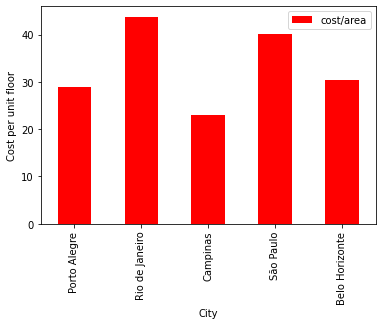

In [ ]:
group_one = data[['city', 'area', 'total (R$)']]
g1 = group_one.groupby('city').mean()
g1 = g1.sort_values(ascending=True, by='area')
g1['cost/area'] = g1['total (R$)']/g1['area']
print(g1)

#plot a bar chart for the feature
g1[['cost/area']].plot(kind = 'bar', color = 'red')
plt.xlabel('City')
plt.ylabel('Cost per unit floor')
plt.show()

We see that although on average, house in <code>Belo Horizonte</code> has more area but **cost per unit area** is more in <code> Rio de Janeiro</code>.

                   floor   total (R$)   cost/floor
city                                              
Porto Alegre    4.894384  2989.782900   610.859908
Belo Horizonte  5.492051  6315.242448  1149.887827
Rio de Janeiro  5.678215  4611.684877   812.171653
Campinas        5.715123  3173.276671   555.242051
São Paulo       7.271446  6380.831833   877.519027


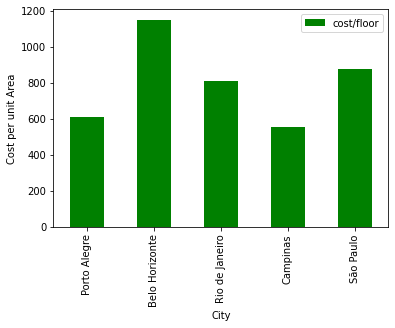

In [ ]:
group_two = data[['city', 'floor', 'total (R$)']]
g2 = group_two.groupby('city').mean()
g2 = g2.sort_values(ascending=True, by='floor')
g2['cost/floor'] = g2['total (R$)']/g2['floor']
print(g2)

#plot a bar chart for the feature
g2[['cost/floor']].plot(kind = 'bar', color = 'green')
plt.xlabel('City')
plt.ylabel('Cost per unit Area')
plt.show()

                   rooms   total (R$)   cost/rooms
city                                              
Porto Alegre    2.140821  2989.782900  1396.558731
Rio de Janeiro  2.243837  4611.684877  2055.266924
Campinas        2.355217  3173.276671  1347.339472
São Paulo       2.558859  6380.831833  2493.624336
Belo Horizonte  3.020668  6315.242448  2090.677632


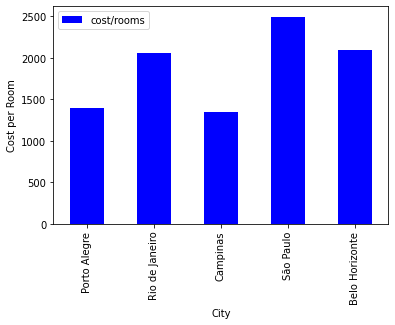

In [ ]:
group_three = data[['city', 'rooms', 'total (R$)']]
g3 = group_three.groupby('city').mean()
g3 = g3.sort_values(ascending=True, by='rooms')
g3['cost/rooms'] = g3['total (R$)']/g3['rooms']
print(g3)

#plot a bar chart for the feature
g3[['cost/rooms']].plot(kind = 'bar', color = 'blue')
plt.xlabel('City')
plt.ylabel('Cost per Room')
plt.show()

                rent amount (R$)   total (R$)
city                                         
Porto Alegre         2337.699916  2989.782900
Campinas             2364.290739  3173.276671
Rio de Janeiro       3232.904064  4611.684877
Belo Horizonte       3664.127981  6315.242448
São Paulo            4652.793783  6380.831833


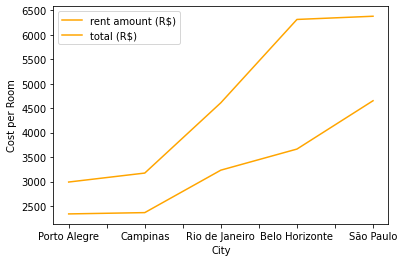

In [ ]:
group_four = data[['city', 'rent amount (R$)', 'total (R$)']]
g4 = group_four.groupby('city').mean()
g4 = g4.sort_values(ascending=True, by='rent amount (R$)')
print(g4)

#plot a bar chart for the feature
g4[['rent amount (R$)', 'total (R$)']].plot(kind = 'line', color = 'orange')
plt.xlabel('City')
plt.ylabel('Cost per Room')
plt.show()

#### **Pearson Correlation**
In trying to find dependence and correlation between various elements, we will use Pearson correlation cooeficient.
<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

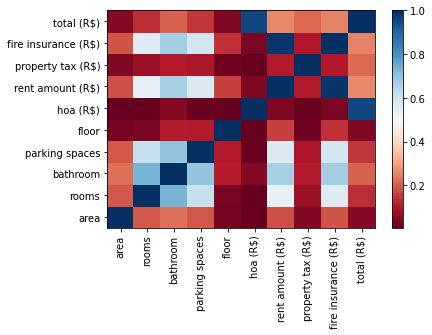

In [ ]:
cor = data.corr()

fig, ax = plt.subplots()
im = ax.pcolor(cor, cmap='RdBu')

#label names
row_labels = cor.columns
col_labels = cor.index

#move ticks and labels to the center
ax.set_xticks(np.arange(cor.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cor.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The diagonal elements are always one as they are denoting the correlation with one another. The more the blue intensity, the larger is the linear correlation between two variables. The values between 0 to 1 indicate that there is only positive linear relation i.e. one feature increases with the other.
<p> Every thing is clear through this map only and we can conclude about the linearily of relationships from this. Still we will plot some graphs to prove it.

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [ ]:
from scipy import stats

#### **House Association Tax against other features**

> From the above correlation map, we see that hoa does not seem to have linear dependence on other features although it does have linear relation with total amount.

>Lets try to plot it against various features and see if other relations exist.

###### **hoa vs area**

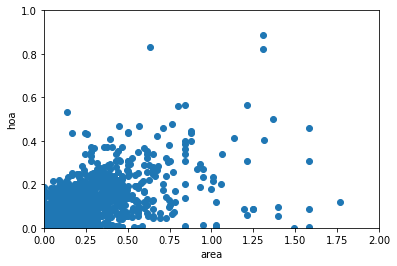

In [ ]:
data['area_normalized'] = (data['area'] - data['area'].mean())/data['area'].std()
data['hoa (R$)_normalized'] = (data['hoa (R$)'] - data['hoa (R$)'].mean())/data['hoa (R$)'].std()
plt.scatter(x = 'area_normalized', y = 'hoa (R$)_normalized', data = data)
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.xlabel('area')
plt.ylabel('hoa')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['area'], data['hoa (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.006890104504921708  with a P-value of P = 0.47623158729173526


With the plot above we can see that there is not particularly a linear relation between the two. The Pearson coefficicent is small however the P value is large so there is no evidence of the coefficinet value. However we can say that it is increasing with increase in area.

###### **hoa vs floors**

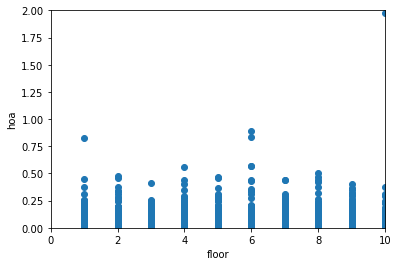

In [ ]:
data['floor_normalized'] = (data['floor'] - data['floor'].mean())/data['floor'].std()
plt.scatter(x = 'floor', y = 'hoa (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.xlabel('floor')
plt.ylabel('hoa')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['floor'], data['hoa (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.005280537947299709  with a P-value of P = 0.5850942399880663


From above, we find interesting relation between the two as the hoa depends interstingly on the floors. We ca nsay that for a particular floor value tends to increase, which may depend on other features.

###### **hoa vs rooms**

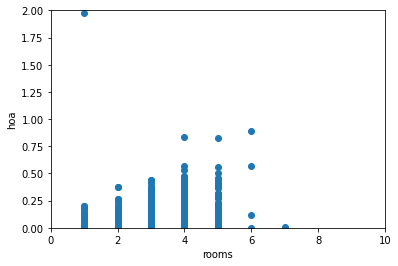

In [ ]:
#data['rooms_normalized'] = (data['rooms'] - data['floor'].mean())/data['floor'].std()
plt.scatter(x = 'rooms', y = 'hoa (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.xlabel('rooms')
plt.ylabel('hoa')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['rooms'], data['hoa (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.007138618515731237  with a P-value of P = 0.4604710350435129


Similarly, we can conclude for rooms as we concluded for floors>

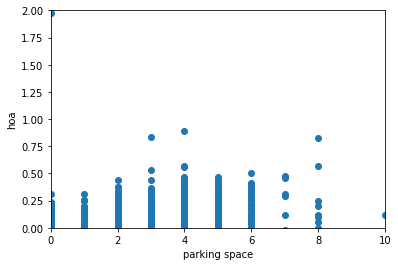

In [ ]:
#data['rooms_normalized'] = (data['rooms'] - data['floor'].mean())/data['floor'].std()
plt.scatter(x = 'parking spaces', y = 'hoa (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.xlabel('parking space')
plt.ylabel('hoa')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['parking spaces'], data['hoa (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.00932143721256299  with a P-value of P = 0.33516391531109757


#### **Property Tax against other features**

> From the above correlation map, we see that property tax does not seem to have linear dependence on other features although it does have linear relation with total amount.

>Lets try to plot it against various features and see if other relations exist.

###### **Property tax vs area**

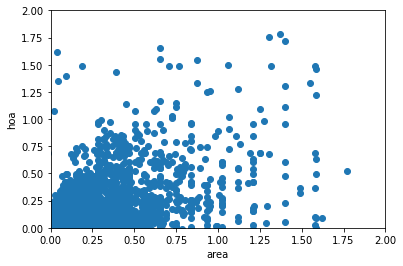

In [ ]:
data['prop (R$)_normalized'] = (data['property tax (R$)'] - data['property tax (R$)'].mean())/data['property tax (R$)'].std()
plt.scatter(x = 'area_normalized', y = 'prop (R$)_normalized', data = data)
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel('area')
plt.ylabel('hoa')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['area'], data['property tax (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.0390585231611026  with a P-value of P = 5.349596762467054e-05


###### **Propeerty tax vs rooms**

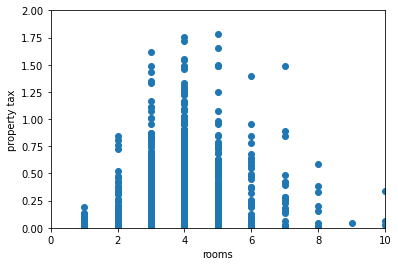

In [ ]:
plt.scatter(x = 'rooms', y = 'prop (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.xlabel('rooms')
plt.ylabel('property tax')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['rooms'], data['property tax (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.07525241965306012  with a P-value of P = 6.627104635190164e-15


###### **Property tax vs floors**

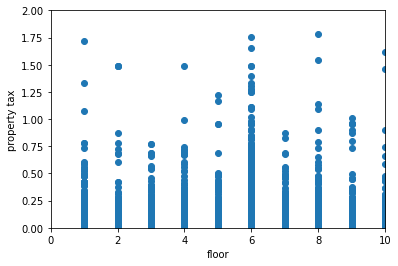

In [ ]:

plt.scatter(x = 'floor', y = 'prop (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.xlabel('floor')
plt.ylabel('property tax')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['floor'], data['property tax (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.02021760087609074  with a P-value of P = 0.03657181540673652


###### **Property tax vs parking space**

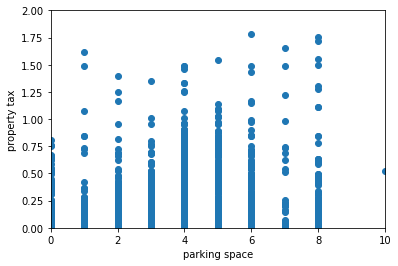

In [ ]:
plt.scatter(x = 'parking spaces', y = 'prop (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.xlabel('parking space')
plt.ylabel('property tax')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['parking spaces'], data['property tax (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.09837766039786719  with a P-value of P = 2.0658608090278485e-24


Again we see for each that, it increases for particular floor or parking space etc depending on other features.

#### **Fire insurance vs other features**

> From the above correlation map, we see that fire insurance as well does not seem to have linear dependence on other features although it does have linear relation with total amount.

>Lets try to plot it against various features and see if other relations exist.

###### **Fire insurance vs area**

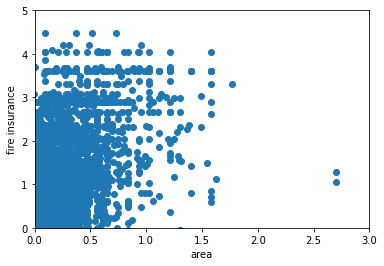

In [ ]:
data['fire (R$)_normalized'] = (data['fire insurance (R$)'] - data['fire insurance (R$)'].mean())/data['fire insurance (R$)'].std()
plt.scatter(x = 'area_normalized', y = 'fire (R$)_normalized', data = data)
plt.xlim(0, 3)
plt.ylim(0, 5)
plt.xlabel('area')
plt.ylabel('fire insurance')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['area'], data['fire insurance (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.18807805236983705  with a P-value of P = 1.0285303493276856e-85


###### **Fire insurance vs rooms**

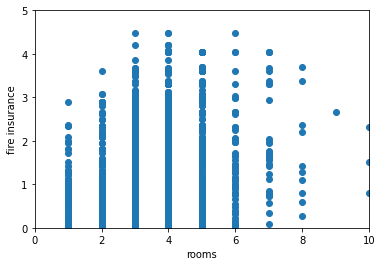

In [ ]:
plt.scatter(x = 'rooms', y = 'fire (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xlabel('rooms')
plt.ylabel('fire insurance')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['rooms'], data['fire insurance (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5651475625128861  with a P-value of P = 0.0


The pearson value of 0.5 indicates somewhat linear relation and we can see the values increase. Although full dependency of fire insurance on rooms is not right as it clearly depends on other features as wel.

###### **Fire insurance vs floors**

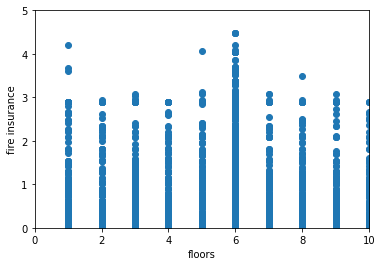

In [ ]:
plt.scatter(x = 'floor', y = 'fire (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xlabel('floors')
plt.ylabel('fire insurance')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['floor'], data['fire insurance (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1378087138420574  with a P-value of P = 1.728462417647204e-46


###### **Fire insurance vs parking lot**


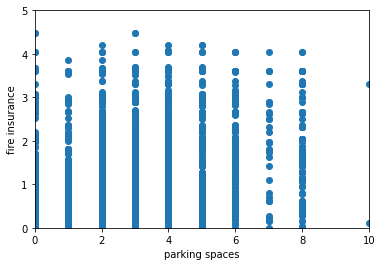

In [ ]:
plt.scatter(x = 'parking spaces', y = 'fire (R$)_normalized', data = data)
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xlabel('parking spaces')
plt.ylabel('fire insurance')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['parking spaces'], data['fire insurance (R$)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5973475311578843  with a P-value of P = 0.0


> **Conclusions:** 
<p> for the various features that we plotted against each other we dont seem to find linear dependence on one particular feature. The histogram like graphs indicate that value for a particular (say floor) changes and this change is dependent on other features. Overall we can say that there is not in particular linear dependence among calculated features.

### **Linear Regression**

###### **One hot encoding animals and furniture**

In [ ]:
print(data['animal'].value_counts().to_frame())
print(data['furniture'].value_counts().to_frame())

           animal
acept        8316
not acept    2376
               furniture
not furnished       8086
furnished           2606


In [ ]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
data['city']= le.fit_transform(data['city'])   
data['animal']= le.fit_transform(data['animal']) 
data['furniture']= le.fit_transform(data['furniture']) 
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),area_normalized,hoa (R$)_normalized,floor_normalized,prop (R$)_normalized,fire (R$)_normalized
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618,-0.147515,0.057142,0.101939,-0.050101,-0.236578
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973,0.318020,0.001666,2.507142,0.445100,0.203046
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841,-0.128893,-0.011161,-0.083077,-0.117994,-0.257513
3,2,51,2,1,0,2,0,1,270,1112,22,17,1421,-0.182895,-0.057979,-0.823140,-0.110915,-0.759941
4,4,25,1,1,0,1,1,1,0,800,25,11,836,-0.231311,-0.075295,-1.008155,-0.109949,-0.885548


Now that we have all the input values in numeric form, it is easier to do linear regression.

**Lets first try to do linear regression of individual features with rent amount.**

> **Rent amount vs area**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

train = data.loc[:9999]
test = data.loc[10000:]
X_train = train[['area']]
Y_train = train['rent amount (R$)']
lm.fit(X_train, Y_train)

X_test = test[['area']]
Y_test = test['rent amount (R$)']
yhat = lm.predict(X_test)
yhat[0:5]

array([3836.18156171, 3784.13688142, 3787.38967394, 3764.62012631,
       3780.8840889 ])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['rent amount (R$)'], yhat)
print('The mean square error of price and predicted value is: ', mse)

print("Mean square error of train set is :", mean_squared_error(train['rent amount (R$)'], lm.predict(X_train)))
print('The R-square is: ', lm.score(X_train, Y_train))

The mean square error of price and predicted value is:  11158446.311727587
Mean square error of train set is : 11244311.247264069
The R-square is:  0.031111055956133393


We can say that ~ 31.11% of the variation of the rent amount is explained by this simple linear model on the basis of R^2 error.
<br>We also se large value of error in both train and test set. Lets analyse visually.

In [ ]:
import seaborn as sns

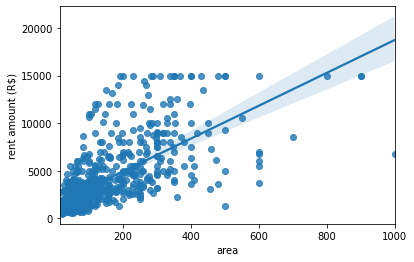

In [ ]:
sns.regplot(x="area", y="rent amount (R$)", data=test)

> **Rent amount vs floor**

In [ ]:
X_train = train[['floor']]
Y_train = train['rent amount (R$)']
lm.fit(X_train, Y_train)

X_test = test[['floor']]
Y_test = test['rent amount (R$)']
yhat = lm.predict(X_test)
yhat[0:5]

array([3650.96503412, 3354.64413346, 4144.8332019 , 3354.64413346,
       4342.38046901])

In [ ]:
mse = mean_squared_error(test['rent amount (R$)'], yhat)
print('The mean square error of price and predicted value is: ', mse)

print("Mean square error of train set is :", mean_squared_error(train['rent amount (R$)'], lm.predict(X_train)))
print('The R-square is: ', lm.score(X_train, Y_train))

The mean square error of price and predicted value is:  11334738.551135434
Mean square error of train set is : 11313502.957650503
The R-square is:  0.025149011528626586


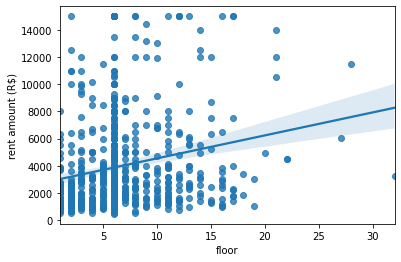

In [ ]:
sns.regplot(x="floor", y="rent amount (R$)", data=test)

> **Rent amount vs rooms**

In [ ]:
X_train = train[['rooms']]
Y_train = train['rent amount (R$)']
lm.fit(X_train, Y_train)

X_test = test[['rooms']]
Y_test = test['rent amount (R$)']
yhat = lm.predict(X_test)
yhat[0:5]

array([3093.9956322 , 3093.9956322 , 3093.9956322 , 1521.00712875,
       1521.00712875])

In [ ]:
mse = mean_squared_error(test['rent amount (R$)'], yhat)
print('The mean square error of price and predicted value is: ', mse)

print("Mean square error of train set is :", mean_squared_error(train['rent amount (R$)'], lm.predict(X_train)))
print('The R-square is: ', lm.score(X_train, Y_train))

The mean square error of price and predicted value is:  8325040.848688591
Mean square error of train set is : 8199386.794914021
The R-square is:  0.2934831632782797


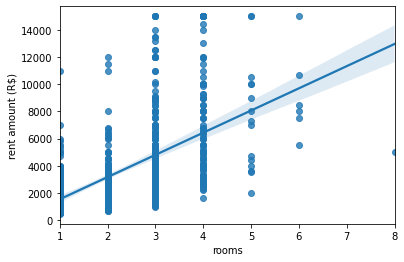

In [ ]:
sns.regplot(x="rooms", y="rent amount (R$)", data=test)

**Rent amount vs bathroom**

In [ ]:
X_train = train[['bathroom']]
Y_train = train['rent amount (R$)']
lm.fit(X_train, Y_train)

X_test = test[['bathroom']]
Y_test = test['rent amount (R$)']
yhat = lm.predict(X_test)
yhat[0:5]

array([1892.48207959, 1892.48207959, 3509.14655275, 1892.48207959,
       3509.14655275])

In [ ]:
mse = mean_squared_error(test['rent amount (R$)'], yhat)
print('The mean square error of price and predicted value is: ', mse)

print("Mean square error of train set is :", mean_squared_error(train['rent amount (R$)'], lm.predict(X_train)))
print('The R-square is: ', lm.score(X_train, Y_train))

The mean square error of price and predicted value is:  6426511.883081884
Mean square error of train set is : 6425397.321075841
The R-square is:  0.4463425737175116


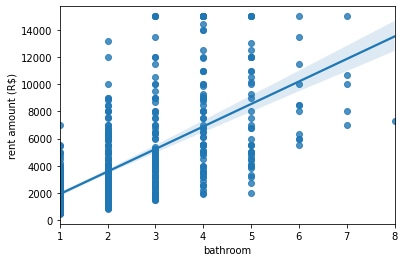

In [ ]:
sns.regplot(x="bathroom", y="rent amount (R$)", data=test)

**Rent amount vs parking space**

In [ ]:
X_train = train[['parking spaces']]
Y_train = train['rent amount (R$)']
lm.fit(X_train, Y_train)

X_test = test[['parking spaces']]
Y_test = test['rent amount (R$)']
yhat = lm.predict(X_test)
yhat[0:5]

array([3137.23121006, 3137.23121006, 3137.23121006, 1890.54886791,
       3137.23121006])

In [ ]:
mse = mean_squared_error(test['rent amount (R$)'], yhat)
print('The mean square error of price and predicted value is: ', mse)

print("Mean square error of train set is :", mean_squared_error(train['rent amount (R$)'], lm.predict(X_train)))
print('The R-square is: ', lm.score(X_train, Y_train))

The mean square error of price and predicted value is:  8123291.167386314
Mean square error of train set is : 7704140.943102284
The R-square is:  0.33615702918720614


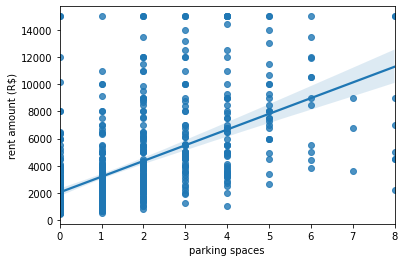

In [ ]:
sns.regplot(x="parking spaces", y="rent amount (R$)", data=test)

Predicting such variables and fitting linear regression model to them is not an appropriate idea as they individually dont vary linearly with them.

**Lets try to fit multivariate regression**

In [ ]:
Z = train[['area',	'rooms',	'bathroom',	'parking spaces',	'floor',	'animal',	'furniture']]

lm.fit(Z, Y_train)
yhat = lm.predict(test[['area',	'rooms',	'bathroom',	'parking spaces',	'floor',	'animal',	'furniture']])
yhat[0:5]

array([1710.27925056, 1564.00362591, 3121.22151184,  813.83073318,
       2765.86093924])

In [ ]:
mse = mean_squared_error(test['rent amount (R$)'], yhat)
print('The mean square error of price and predicted value is: ', mse)

print("Mean square error of train set is :", mean_squared_error(train['rent amount (R$)'], lm.predict(Z)))
print('The R-square is: ', lm.score(Z, Y_train))

The mean square error of price and predicted value is:  5795891.787325358
Mean square error of train set is : 5731629.702269957
The R-square is:  0.5061224713755574


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

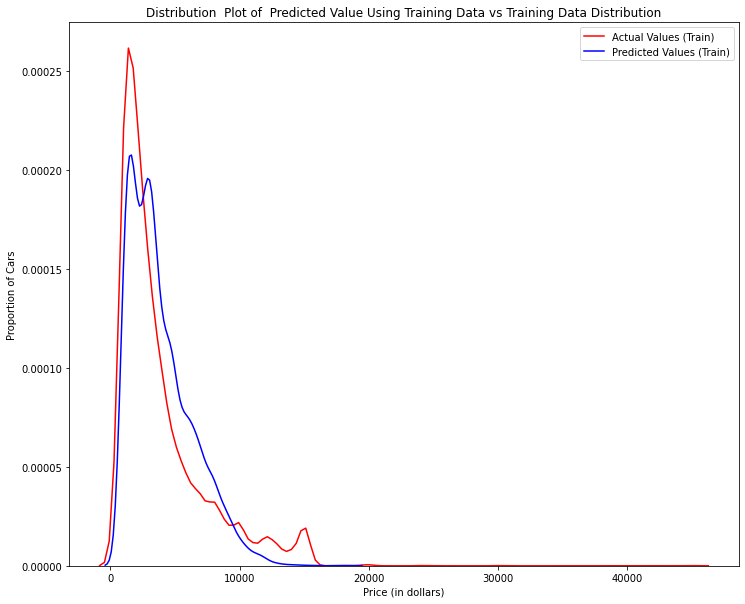

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(Y_train, lm.predict(Z), "Actual Values (Train)", "Predicted Values (Train)", Title)

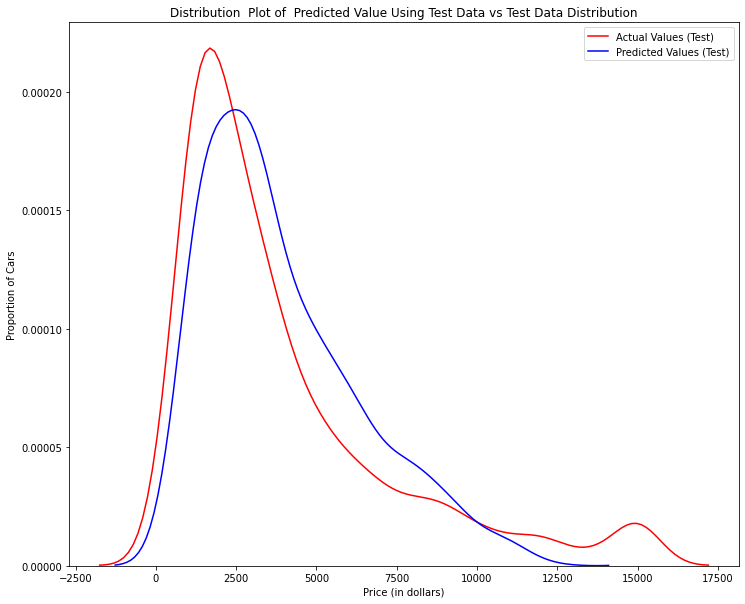

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(Y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)

We can see that our model doesn't fit quite well. Although it is quite better than individual linear regression models, it still has a lot of error and an R^2 score of only ~ 0.5 . 

>**To improve this, we can try methods like Ridge Regression, or try fitting polynomial model to our data.**

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RigeModel=Ridge(alpha=0.1)

In [ ]:
RigeModel.fit(Z, Y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
yhat = RigeModel.predict(test[['area',	'rooms',	'bathroom',	'parking spaces',	'floor',	'animal',	'furniture']])
yhat[0:5]

array([1710.30303197, 1564.02596824, 3121.23713797,  813.85160908,
       2765.8817425 ])

In [ ]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(Z, Y_train)
    Rsqu_test.append(RigeModel.score(test[['area',	'rooms',	'bathroom',	'parking spaces',	'floor',	'animal',	'furniture']], Y_test))
    Rsqu_train.append(RigeModel.score(Z, Y_train))

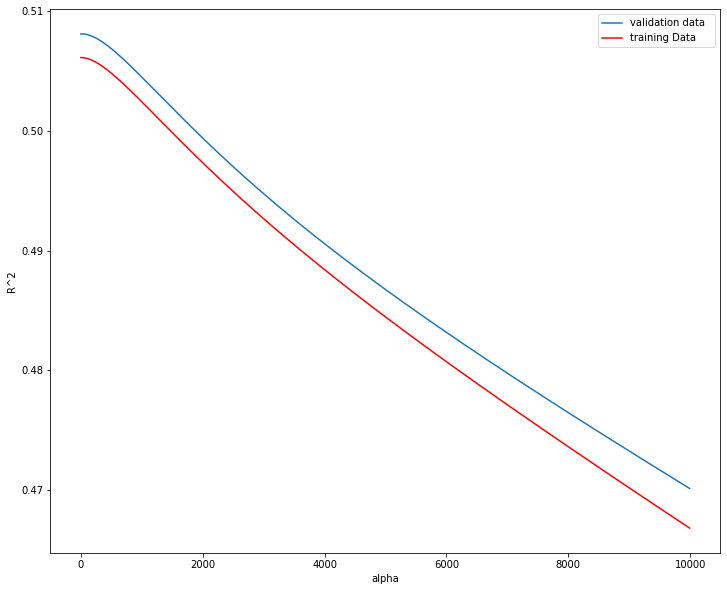

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa .
<br>The red line in the above figure represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

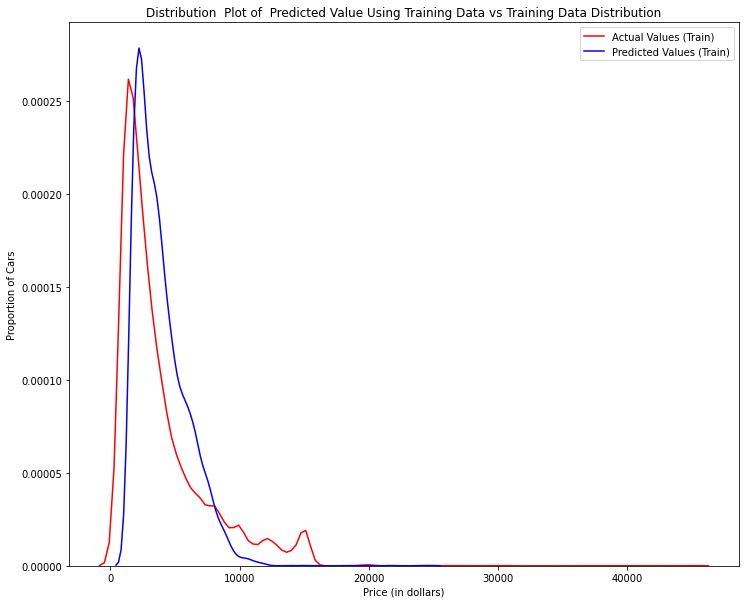

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(Y_train, RigeModel.predict(Z), "Actual Values (Train)", "Predicted Values (Train)", Title)

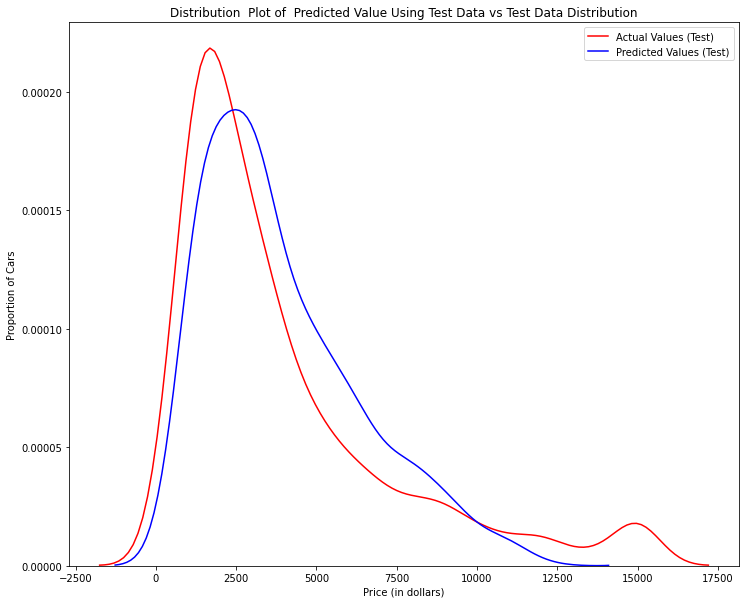

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(Y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)

Therefore, we see that although not much, but there is some change in distribution curve in the train data and is much closer to actual data. Using the model, we can find the appropriate value of alpha which is close to zero only. So our model uses 0.1 and still there is not much change, for more accuracy we ca ntry to fit polynomial model.